<a href="https://colab.research.google.com/github/JWK7/CMPE-255-Group-5-Spotify-Recommendation-System/blob/master/Spotify_Recommendation_System_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Import the csv into a pandas dataframe
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


In [ ]:
spotify_data = pd.read_csv("tracks.csv")

In [ ]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [ ]:
spotify_data["name"].head(10)

0                                  Carve
1    Capítulo 2.16 - Banquero Anarquista
2     Vivo para Quererte - Remasterizado
3          El Prisionero - Remasterizado
4                    Lady of the Evening
5                              Ave Maria
6                         La Butte Rouge
7                                La Java
8                     Old Fashioned Girl
9          Martín Fierro - Remasterizado
Name: name, dtype: object

In [ ]:
#Dropping unncessary columns (id and id_artists)
spotify_data = spotify_data.drop(["id","id_artists"],axis=1)

In [ ]:
spotify_data.columns

Index(['name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'release_date', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature'],
      dtype='object')

In [ ]:
#checking for missing values
print("Missing in name: ",spotify_data.name.isna().sum())
print("Missing in popularity: ",spotify_data.popularity.isna().sum())
print("Missing in duration_ms: ",spotify_data.duration_ms.isna().sum())
print("Missing in explicit: ",spotify_data.explicit.isna().sum())
print("Missing in artists: ",spotify_data.artists.isna().sum())
print("Missing in release_date: ",spotify_data.release_date.isna().sum())
print("Missing in danceability: ",spotify_data.danceability.isna().sum())
print("Missing in energy: ",spotify_data.energy.isna().sum())
print("Missing in key: ",spotify_data.key.isna().sum())
print("Missing in loudness: ",spotify_data.loudness.isna().sum())
print("Missing in mode: ",spotify_data["mode"].isna().sum())
print("Missing in speechiness: ",spotify_data.speechiness.isna().sum())
print("Missing in acousticness: ",spotify_data.acousticness.isna().sum())
print("Missing in instrumentalness: ",spotify_data.instrumentalness.isna().sum())
print("Missing in liveness: ",spotify_data.liveness.isna().sum())
print("Missing in valence: ",spotify_data.valence.isna().sum())
print("Missing in tempo: ",spotify_data.tempo.isna().sum())
print("Missing in time_signature: ",spotify_data.time_signature.isna().sum())

Missing in name:  71
Missing in popularity:  0
Missing in duration_ms:  0
Missing in explicit:  0
Missing in artists:  0
Missing in release_date:  0
Missing in danceability:  0
Missing in energy:  0
Missing in key:  0
Missing in loudness:  0
Missing in mode:  0
Missing in speechiness:  0
Missing in acousticness:  0
Missing in instrumentalness:  0
Missing in liveness:  0
Missing in valence:  0
Missing in tempo:  0
Missing in time_signature:  0


In [ ]:
spotify_data = spotify_data.drop(spotify_data[spotify_data['name'].isnull()].index)
print("Missing in name: ",spotify_data.name.isna().sum())

Missing in name:  0


In [ ]:
spotify_data.release_date.unique()

array(['1922-02-22', '1922-06-01', '1922-03-21', ..., '1991-05',
       '1996-10-06', '2009-11-28'], dtype=object)

In [ ]:
spotify_data.release_date[:]= spotify_data.release_date[:].str[0:4]

/var/folders/hc/cj8v80x569nb450ww56q_lsw0000gn/T/ipykernel_19782/1498452740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_data.release_date[:]= spotify_data.release_date[:].str[0:4]


In [ ]:
spotify_data.release_date = pd.to_numeric(spotify_data.release_date)

In [ ]:
#ENCODING
from sklearn.preprocessing import LabelEncoder

#Label Encoding for the column
label_encoder=LabelEncoder()

label_encoder.classes=np.array(['',])
spotify_data["name"]=label_encoder.fit_transform(spotify_data["name"])
nameMapping = dict(zip(label_encoder.classes_,label_encoder.transform(label_encoder.classes_)))

print(spotify_data["name"])

label_encoder.classes=np.array(['',])
label_encoder=LabelEncoder()
spotify_data["artists"]=label_encoder.fit_transform(spotify_data["artists"])
artistMapping = dict(zip(label_encoder.classes_,label_encoder.transform(label_encoder.classes_)))

print(spotify_data["artists"])


0          62328
1          60987
2         377628
3         106033
4         198883
           ...  
586667    429410
586668    399846
586669    384868
586670     13688
586671    220476
Name: name, Length: 586601, dtype: int64
0         103290
1          32586
2          44116
3          44116
4          25189
           ...  
586667    113812
586668     81826
586669     31568
586670     36288
586671      3264
Name: artists, Length: 586601, dtype: int64


In [ ]:
nameMapping

{'!': 0,
 '! (The Song Formerly Known As)': 1,
 '!!De Repente!!': 2,
 '!H.a.p.p.y!': 3,
 "!I'll Be Back!": 4,
 "!Me Voy Pal' Pueblo - Live": 5,
 '!Que Vida! - Mono Version': 6,
 '!Uno! . . .': 7,
 '" Achtung, fertig los! "': 8,
 '" Artista " Por un Mes': 9,
 '" El Profesor Tachuela " (Tacuarembó)': 10,
 '"16 tonna" fekete szén': 11,
 '"2"': 12,
 '"20" Kaksikymppinen': 13,
 '"33"': 14,
 '"40" - Live': 15,
 '"40" - Remastered 2008': 16,
 '"43"': 17,
 '"A" You\'re Adorable': 18,
 '"Addio, mio dolce amor!" from Edgar (Act III) - Voice': 19,
 '"Amarilli mia bella" - 1955 Version': 20,
 '"Anne-Marie Stretter, Lol V. Stein..."': 21,
 '"Arkadaş" Şarkısını Duyunca': 22,
 '"Autoportrait, je ne comprends pas..."': 23,
 '"B" Movie Box Car Blues - Live': 24,
 '"Blasco" Rossi - Live From Milan,Italy/1989': 25,
 '"C" is for Cookie - Live': 26,
 '"Carmen Fantasie", by Franz Waxman, based on themes from an opera by Georges Bizet': 27,
 '"Cassius" Love Vs. "Sonny" Wilson - Remastered 2001': 28,
 '"Ch\'i

In [ ]:
artistMapping

{'["\'In The Heights\' Original Broadway Company", \'Mandy Gonzalez\']': 0,
 '["\'Om\' Alec Khaoli & Umoja"]': 1,
 '["\'T Hof Van Commerce", \'TLP\']': 2,
 '["\'T Hof Van Commerce"]': 3,
 '["\'Til Tuesday"]': 4,
 '["100 First Songs\' Participants"]': 5,
 '["23\'O"]': 6,
 '["5\'nizza", \'[dunkelbunt]\']': 7,
 '["5\'nizza"]': 8,
 '["5/8erl In Ehr\'n"]': 9,
 '["90\'s FIN Cover Boyz & Girlz!"]': 10,
 '["A girl with her friends recorded at St. Ann\'s College"]': 11,
 '["A\'Studio"]': 12,
 '["AKA ChaP in 00\'S"]': 13,
 '["Adam & die Micky\'s"]': 14,
 '["Adolescent\'s Orquesta"]': 15,
 '["Agrupación Así D\' Ron"]': 16,
 '["Aidan O\'Rourke", \'Kit Downes\']': 17,
 '["Al\'fa"]': 18,
 '["Alan Davey\'s Eclectic Devils"]': 19,
 '["Alex D\'Castro"]': 20,
 '["Alex D\'Elia", \'Nihil Young\']': 21,
 '["Alex O\'Rion"]': 22,
 '["Alexander \'Skip\' Spence"]': 23,
 '["Alexander O\'Neal", \'Cherrelle\']': 24,
 '["Alexander O\'Neal"]': 25,
 '["Alexis Korner\'s Blues Incorporated"]': 26,
 '["Alibi Montana fe

In [ ]:
# standardize all quantitative columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(spotify_data)
spotify_data_scaled = scaler.transform(spotify_data)

In [ ]:
df = pd.DataFrame(spotify_data_scaled, columns = spotify_data.columns)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(4)



/var/folders/hc/cj8v80x569nb450ww56q_lsw0000gn/T/ipykernel_19782/3660509995.py:6: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(4)


,name,popularity,duration_ms,explicit,artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
name,1.0000,-0.0261,0.0513,-0.0089,0.0786,0.0577,-0.0375,-0.0096,0.0035,0.0283,-0.0029,-0.1532,-0.0131,-0.0225,-0.0516,-0.0536,0.0262,0.0334
popularity,-0.0261,1.0000,0.0276,0.2117,-0.0199,0.5908,0.1869,0.3022,0.0153,0.3270,-0.0337,-0.0474,-0.3707,-0.2364,-0.0487,0.0046,0.0712,0.0867
duration_ms,0.0513,0.0276,1.0000,-0.0168,0.0264,0.0541,-0.1204,0.0248,0.0046,0.0003,-0.0276,-0.1258,-0.0644,0.0693,0.0021,-0.1632,-0.0012,0.0376
explicit,-0.0089,0.2117,-0.0168,1.0000,-0.0012,0.2085,0.1502,0.1231,0.0109,0.1346,-0.0518,0.1023,-0.1490,-0.0675,-0.0131,-0.0166,0.0057,0.0444
artists,0.0786,-0.0199,0.0264,-0.0012,1.0000,0.0088,-0.0227,0.0189,0.0027,0.0187,0.0072,-0.0501,-0.0252,-0.0162,-0.0185,-0.0048,0.0169,0.0110
release_date,0.0577,0.5908,0.0541,0.2085,0.0088,1.0000,0.2266,0.4601,0.0237,0.4471,-0.0813,-0.0820,-0.5274,-0.2219,-0.0210,-0.0248,0.1205,0.1164
danceability,-0.0375,0.1869,-0.1204,0.1502,-0.0227,0.2266,1.0000,0.2415,0.0188,0.2514,-0.0447,0.1993,-0.2428,-0.2258,-0.1062,0.5281,-0.0409,0.1462
energy,-0.0096,0.3022,0.0248,0.1231,0.0189,0.4601,0.2415,1.0000,0.0363,0.7647,-0.0652,-0.0536,-0.7154,-0.1957,0.1246,0.3722,0.2300,0.1890
key,0.0035,0.0153,0.0046,0.0109,0.0027,0.0237,0.0188,0.0363,1.0000,0.0271,-0.1295,-0.0010,-0.0274,-0.0068,-0.0068,0.0200,0.0049,0.0089
loudness,0.0283,0.3270,0.0003,0.1346,0.0187,0.4471,0.2514,0.7647,0.0271,1.0000,-0.0405,-0.1671,-0.5194,-0.3293,0.0295,0.2754,0.1893,0.1644


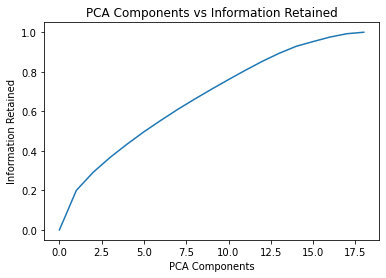

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=len(df.columns))
x = pca.fit_transform(df)
x = pd.DataFrame(x)
totalVar = sum(pca.explained_variance_)
listOfTopPCAs = []
for i in range(len(df.columns)+1):
    listOfTopPCAs.append(sum(pca.explained_variance_[:i])/totalVar)

    
    
ax1 = plt.subplot()
ax1.plot(listOfTopPCAs)

ax1.set_xlabel('PCA Components')
ax1.set_ylabel('Information Retained')
ax1.set_title('PCA Components vs Information Retained')
plt.show()

In [ ]:
pca = PCA(n_components=12)
spotifyPCA_DF = pca.fit_transform(df)
spotifyPCA_DF = pd.DataFrame(spotifyPCA_DF)
print("Information Retained ",sum(pca.explained_variance_[:12])/totalVar)

Information Retained  0.8528731991746431


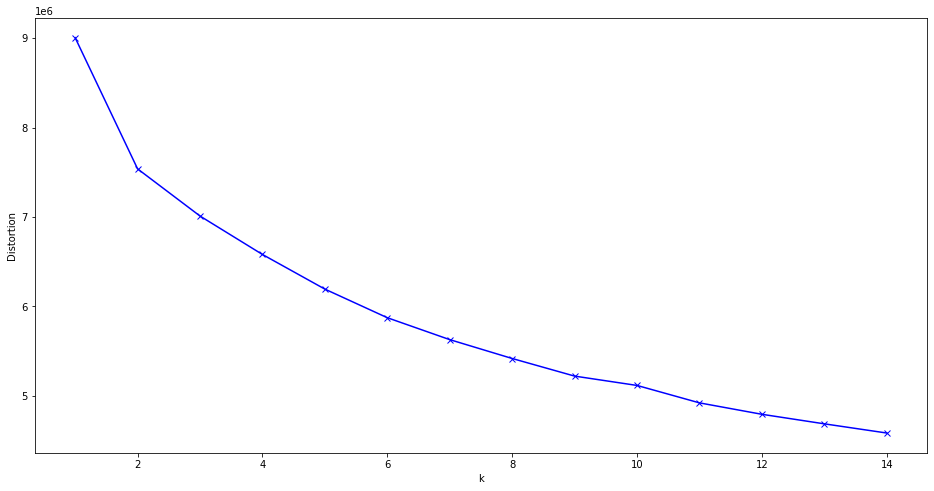

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(spotifyPCA_DF)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
km = KMeans(n_clusters=6)
pred = km.fit_predict(spotifyPCA_DF)


In [ ]:
spotifyPCA_DF['pred'] = pred

In [ ]:
spotifyPCA_DF

,0,1,2,3,4,5,6,7,8,9,10,11,pred
0,3.407950,-1.458634,0.270546,0.856376,-0.912151,0.216842,0.012924,2.623532,0.415488,0.898134,-0.377829,1.430999,2
1,4.334470,-5.060003,2.318236,1.561336,-1.592910,0.762039,-2.857981,0.634909,0.853700,3.413673,1.569340,1.361757,4
2,3.611833,-0.380809,-1.817507,-0.495511,-0.974436,-0.011004,1.410871,-0.533424,-1.936038,-0.975230,-0.066668,-1.970556,5
3,5.690453,0.056263,-0.917642,0.550482,0.460330,-1.355804,-2.040510,2.093694,-0.684162,-0.260321,1.171657,0.492344,2
4,3.969396,-0.306501,-0.081339,0.258122,0.769935,-0.505079,0.323348,-0.526056,-1.075490,0.274225,-1.196524,-0.936570,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
586596,-0.630376,2.040915,0.379768,-1.258249,-0.773446,1.757575,-0.030687,0.239191,-0.358383,1.238044,-1.368133,-1.245128,3
586597,-2.863353,0.471938,-0.350833,-0.994427,-2.175297,0.701229,-0.501136,0.028091,-0.355881,0.421969,-0.380259,-0.349805,1
586598,0.033554,1.909134,1.707685,-1.530939,0.272069,0.061479,-1.461988,-1.253253,-0.788704,-0.170631,-0.663344,-1.643245,5
586599,-1.856999,-0.206156,1.439416,-0.077172,0.063886,-1.060979,-0.214363,-0.697746,1.639436,-1.725934,-0.505912,0.572532,1


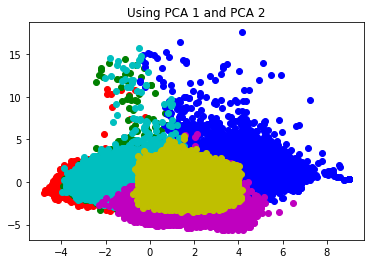

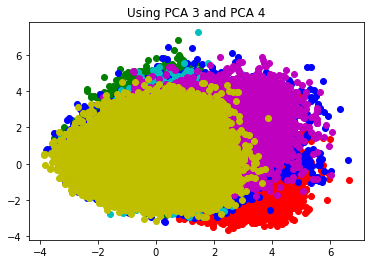

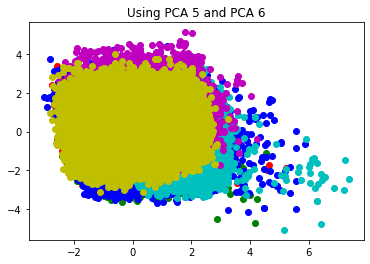

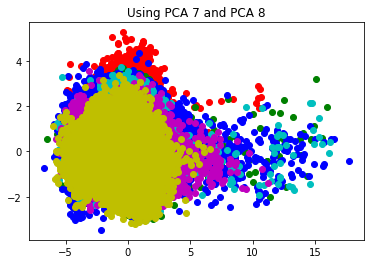

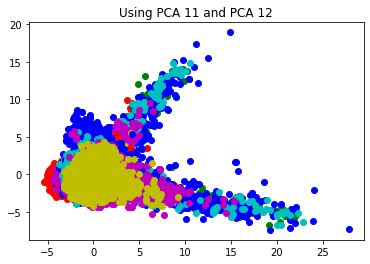

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
temp1 = spotifyPCA_DF[spotifyPCA_DF["pred"] == 0]
temp2 = spotifyPCA_DF[spotifyPCA_DF["pred"] == 1]
temp3 = spotifyPCA_DF[spotifyPCA_DF["pred"] == 2]
temp4 = spotifyPCA_DF[spotifyPCA_DF["pred"] == 3]
temp5 = spotifyPCA_DF[spotifyPCA_DF["pred"] == 4]
temp6 = spotifyPCA_DF[spotifyPCA_DF["pred"] == 5]
temp7 = spotifyPCA_DF[spotifyPCA_DF["pred"] == 6]

plt.scatter(temp1[0],temp1[1],color='r')
plt.scatter(temp2[0],temp2[1],color='g')
plt.scatter(temp3[0],temp3[1],color='b')
plt.scatter(temp4[0],temp4[1],color='c')
plt.scatter(temp5[0],temp5[1],color='m')
plt.scatter(temp6[0],temp6[1],color='y')
plt.scatter(temp7[0],temp7[1],color='k')
plt.title("Using PCA 1 and PCA 2")
plt.show()


plt.scatter(temp1[2],temp1[3],color='r')
plt.scatter(temp2[2],temp2[3],color='g')
plt.scatter(temp3[2],temp3[3],color='b')
plt.scatter(temp4[2],temp4[3],color='c')
plt.scatter(temp5[2],temp5[3],color='m')
plt.scatter(temp6[2],temp6[3],color='y')
plt.scatter(temp7[2],temp7[3],color='k')
plt.title("Using PCA 3 and PCA 4")
plt.show()

plt.scatter(temp1[4],temp1[5],color='r')
plt.scatter(temp2[4],temp2[5],color='g')
plt.scatter(temp3[4],temp3[5],color='b')
plt.scatter(temp4[4],temp4[5],color='c')
plt.scatter(temp5[4],temp5[5],color='m')
plt.scatter(temp6[4],temp6[5],color='y')
plt.scatter(temp7[4],temp7[5],color='k')
plt.title("Using PCA 5 and PCA 6")
plt.show()

plt.scatter(temp1[6],temp1[7],color='r')
plt.scatter(temp2[6],temp2[7],color='g')
plt.scatter(temp3[6],temp3[7],color='b')
plt.scatter(temp4[6],temp4[7],color='c')
plt.scatter(temp5[6],temp5[7],color='m')
plt.scatter(temp6[6],temp6[7],color='y')
plt.scatter(temp7[6],temp7[7],color='k')
plt.title("Using PCA 7 and PCA 8")
plt.show()

plt.scatter(temp1[8],temp1[9],color='r')
plt.scatter(temp2[8],temp2[9],color='g')
plt.scatter(temp3[8],temp3[9],color='b')
plt.scatter(temp4[8],temp4[9],color='c')
plt.scatter(temp5[8],temp5[9],color='m')
plt.scatter(temp6[8],temp6[9],color='y')
plt.scatter(temp7[8],temp7[9],color='k')
plt.title("Using PCA 9 and PCA 10")


plt.scatter(temp1[10],temp1[11],color='r')
plt.scatter(temp2[10],temp2[11],color='g')
plt.scatter(temp3[10],temp3[11],color='b')
plt.scatter(temp4[10],temp4[11],color='c')
plt.scatter(temp5[10],temp5[11],color='m')
plt.scatter(temp6[10],temp6[11],color='y')
plt.scatter(temp7[10],temp7[11],color='k')
plt.title("Using PCA 11 and PCA 12")
plt.show()

In [ ]:
X = df.drop("name", axis=1)
X = X.values
y = df["name"]
y = y.values

In [ ]:
def recommendSong():
    song = input("What song do you like? ")
    recType = input("Would you like regular recommendation or do you feel lucky?")
    
    if recType == 'lucky':
        luckyRecommendation(song)
    if recType == 'regular':
        regularRecommendation(song)
    

In [ ]:
def luckyRecommendation(song):
    mappedName = nameMapping[song]
    songIndex = spotify_data[spotify_data['name']==mappedName].index[0]
    clusterNum = spotifyPCA_DF['pred'][songIndex]
    cluster = spotifyPCA_DF[spotifyPCA_DF["pred"] == clusterNum]
    recommended = cluster.sample(5).index
    print("Recommended Songs:")
    for i in range(5):
        convertMeBack= spotify_data["name"][recommended[i]]
        print(list(nameMapping.keys())[list(nameMapping.values()).index(convertMeBack)])
    return

In [ ]:
def regularRecommendation(song):
    mappedName = nameMapping[song]
    songIndex = spotify_data[spotify_data['name']==mappedName].index[0]
    transformSong = scaler.transform(spotify_data.iloc[songIndex:songIndex+1])
    transformSong = transformSong[0][1:]
    distances = np.linalg.norm(X - transformSong, axis=1)
    k = 6
    nearest_neighbor_ids = distances.argsort()[:k]
    print("Recommended Songs:")
    for i in range(5):
        convertMeBack= spotify_data["name"][nearest_neighbor_ids[i+1]]
        print(list(nameMapping.keys())[list(nameMapping.values()).index(convertMeBack)])
    return
        
    
    

In [ ]:
recommendSong()

What song do you like? Carve
Would you like regular recommendation or do you feel lucky?lucky
Recommended Songs:
La Wally, IAC 5, Act III: "È desta ancora la selvaggia... Oh ciel! chi batte?" (Gellner, Wally)
Medley: Pat-A-Cake / Three Blind Mice / Jingle Bells
The Last Bus Home
Waldmeister: Ouvertüre
Someone to Watch Over Me - 78rpm Version
